# Using protein representations to identify antimicrobial peptides  
  
As others have mentioned in the seminar, antimicrobial resistance is a pressing issue on the worldwide healthcare system, with an estimated 4.95 million deaths per year [WHO, 2023](https://www.who.int/news/item/28-07-2023-vaccines-could-avert-half-a-million-deaths-associated-with-anti-microbial-resistance-a-year#:~:text=Globally%20there%20are%204.95%20million,burden%20of%20drug%2Dresistant%20infections). This has meant that resistant infections are now a more common cause of death than HIV/AIDS and Malaria [RKI, 2022](https://www.rki.de/EN/Content/infections/antibiotic/brochure_IHME_RKI.pdf?__blob=publicationFile). In Germany, there approximately 10, 000 deaths that could be directly attributed to infections that were resistant to antibiotics in 2019 [Christopher, J. et.al, 2022](https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(21)02724-0/fulltext). All of this shows that antimicrobial resistance is an issue that has to be addressed.  
  
One way in which we can combat antimicrobial resistance is by identifying and developing new forms of treatment. As it turns out, there are many proteins that exhibit antimicrobial properties. This means that many organims naturally produce proteins that kill other microbial species. At the same time, scientists have been exploring the possibility of synthesizing novel proteins that can target bacteria. This line of research has proven to be quite exciting as has prompted many researchers to compile all of the known antimicrobial peptides into databases. One such database is the [Database of Antimicrobial Activity and Structure of Peptides](https://dbaasp.org/home).  
  
Below I give a small overview of the data.

## Reading in data from DBAASP

In [23]:
# Importing libraries
import os # This library allows us to interact with the operating system
import pandas as pd # This library allows us to work with dataframes

import seaborn as sns # This library allows us to create plots
import matplotlib.pyplot as plt # This library allows us to control some of the plot's features


I downloaded information from the DBAASP on January 16, 2024 using the [search tab](https://dbaasp.org/home). I filter the data so that only monomers (proteins that are only made up of one amino acid chain) are shown. From there, I create three separate downloads and save them in the [data/dbaasp](data/dbaasp/) directory:  

- [peptides_gram_negative.csv](data/dbaasp/peptides_gram_negative.csv): Peptides that have been experimentally validated to act agaisnt [Gram negative](https://en.wikipedia.org/wiki/Gram_stain) bacteria.  
- [peptides_gram_positive.csv](data/dbaasp/peptides_gram_positive.csv): Peptides that have been experimentally validated to act agaisnt [Gram positive](https://en.wikipedia.org/wiki/Gram_stain) bacteria.  
- [peptides_mammalian.csv](data/dbaasp/peptides_mammalian.csv): Peptides that have been experimentally validated to act agaisnt mammalian cells, such as human cells. This would indicate that these proteins are harmful to the host. 


In [24]:

# Path to the folder
folder_path = 'data/dbaasp'

# Get the list of files in the folder
file_list = os.listdir(folder_path)

# Dictionary to store the dataframes
peptide_dict = {}

# Loop through the files
for file_name in file_list:
    # Construct the full file path
    file_path = os.path.join(folder_path, file_name)

    # Read the file into a dataframe
    df_name = file_name.split('.')[0]  # Use the file name as the dataframe name

    # Store the dataframe in the dictionary
    peptide_dict[df_name] = pd.read_csv(file_path)
    

# Show the datafranme names
peptide_dict["peptides_gram_negative"].sample(5)

,ID,COMPLEXITY,NAME,N TERMINUS,SEQUENCE,C TERMINUS,SYNTHESIS TYPE,TARGET GROUP,TARGET OBJECT
10052,12656,Monomer,NaN,C12,RIWR,AMD,Synthetic,NaN,NaN
754,1061,Monomer,"Linear Cathelicidin-1, Linear Bac1 [C3S][C11S]",NaN,RLSRIVVIRVSR,NaN,Synthetic,NaN,NaN
10385,13061,Monomer,"Similar to Plectasin acc. no. Q53I06, Po Defen...",NaN,GFGCNGPWDEDDMKCHNHCKTIKGYKGGYCASAGFVCKCY,NaN,Ribosomal,NaN,NaN
14771,18879,Monomer,"Cyclo(L-Pro-D-Arg), Diketopiperazine (Pr)",NaN,Pr,NaN,Nonribosomal,NaN,NaN
3683,4647,Monomer,Rev-NIS [L3S],NaN,ELSKAVRLIK,NaN,Synthetic,NaN,NaN


## Assign activity labels  
  
Now that we have these three categories of peptides, it is important to keep in mind that these sets are overlapping. A protein that is effective against Gram negative can also be active against Gram positive, for example. We can create some specific labels to get a better idea of how these proteins behave.

In [25]:
# Gather all protein IDs
all_pids = list(set(peptide_dict["peptides_gram_negative"]["ID"]).union(peptide_dict["peptides_gram_positive"]["ID"], peptide_dict["peptides_mammalian"]["ID"]))

print("Number of unique protein IDs:", len(all_pids))

Number of unique protein IDs: 18858


In [26]:
# Gather all proteins that are active against both gram-negative and gram-positive bacteria
all_antibacterial_pids = list(set(peptide_dict["peptides_gram_negative"]["ID"]).union(peptide_dict["peptides_gram_positive"]["ID"]))

# Gather the proteins that are active against bacteria but *not* against mammalian cells
specific_antibacterial_pids = list(set(all_antibacterial_pids).difference(peptide_dict["peptides_mammalian"]["ID"]))

# Gather proteins that are active against bacteria *and* against mammalian cells
cytotoxic_pids = list(set(peptide_dict["peptides_mammalian"]["ID"]).intersection(all_antibacterial_pids))

# Gather proteins that are active against mammalian cells but *not* against bacteria
specific_cytotoxic_pids = list(set(peptide_dict["peptides_mammalian"]["ID"]).difference(all_antibacterial_pids))



print("Number of proteins that are active against bacteria:", len(all_antibacterial_pids))
print("Number of proteins that are active against bacteria but not against mammalian cells:", len(specific_antibacterial_pids))
print("Number of proteins that are active against both bacteria and mammalian cells:", len(cytotoxic_pids))
print("Number of proteins that are active against mammalian cells but not against bacteria:", len(specific_cytotoxic_pids))


Number of proteins that are active against bacteria: 17907
Number of proteins that are active against bacteria but not against mammalian cells: 7222
Number of proteins that are active against both bacteria and mammalian cells: 10685
Number of proteins that are active against mammalian cells but not against bacteria: 951


As we can see, while there are ~17K protein sequences that are active against bacteria, the majority of those (~10K) are also harmful to mammalian cells. These unspecific proteins are not likely to be iteresting candidates as they could also potentially be harmful to humans if not treated carefully. 
  
We can now create a new dataframe that summarises the activity of the proteins in one column

In [27]:
def assign_class(row, class_dict):
    """
    Assigns a class to a peptide based on its ID.
    """
    pid = row["ID"]
    for key, value in class_dict.items():
        if pid in value:
            return key
        
# Create a dictionary with the protein activities 
protein_classes = {}

# Proteins that only kill bacteria
protein_classes["antibacterial"] = specific_antibacterial_pids

# Proteins that kill bacteria and mammalian cells
protein_classes["antibacterial_mammalian"] = cytotoxic_pids

# Proteins that only kill mammalian cells
protein_classes["mammalian"] = specific_cytotoxic_pids


# Create a dataframe with all PIDs
all_pids_df = pd.DataFrame({"ID": all_pids})

# Assign a class to each PID
all_pids_df["activity"] = all_pids_df.apply(assign_class, args=(protein_classes,), axis=1)

all_pids_df.sample(5)

,ID,activity
18708,21585,antibacterial_mammalian
16869,19464,antibacterial_mammalian
16962,19575,antibacterial_mammalian
1624,1838,antibacterial
14786,17071,antibacterial_mammalian


In [28]:
all_pids_df["activity"].value_counts()

antibacterial_mammalian    10685
antibacterial               7222
mammalian                    951
Name: activity, dtype: int64

## Add additional data  
  
Now that we have all of the corresponding labels, we can add information about the amino-acid sequence, name, etc.

In [29]:
# Combine all three dataframes into one
combined_df = pd.concat([peptide_dict["peptides_gram_negative"], peptide_dict["peptides_gram_positive"], peptide_dict["peptides_mammalian"]])

# Drop repeated rows
combined_df.drop_duplicates(inplace=True)

# Drop non-informative columns
combined_df.drop(columns=["TARGET GROUP", "TARGET OBJECT", "COMPLEXITY"], inplace=True)

# Merge the combined dataframe with the dataframe containing the protein classes
combined_df = combined_df.merge(all_pids_df, on="ID")

combined_df.sample(5)


,ID,NAME,N TERMINUS,SEQUENCE,C TERMINUS,SYNTHESIS TYPE,activity
13042,16718,"LF11 [Q2V,Q4A]",NaN,FVWARNIRKVR,AMD,Synthetic,antibacterial
16051,20629,SMAP-29 (1-18) [G7A],NaN,RGLRRLARKIAHGVKKYG,NaN,Synthetic,antibacterial
17147,8472,NaN,NaN,RXRXR,AMD,Synthetic,antibacterial
7539,9586,NaN,NaN,WALRLYLVY,AMD,Synthetic,antibacterial
15694,20174,Hm-AMP5,NaN,FIFSKLFLGLIKI,NaN,Synthetic,antibacterial


## Basic exploration  
  
Here are some basic exploratory plots that we do to explore the data

### Sequence length  
  
Typically, a short peptide has a length $\leq$ 100 amino-acids. Let's check out the size of the proteins in our dataset

Text(0.5, 1.0, 'Distribution of peptide lengths')

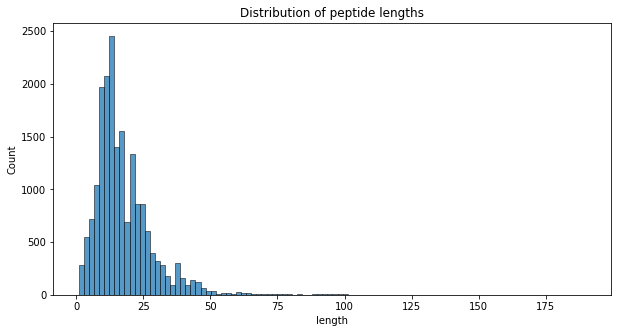

In [30]:
# Add a column with the peptide length
combined_df["length"] = combined_df["SEQUENCE"].apply(len)

# Plot a histogram of the peptide lengths
plt.figure(figsize=(10, 5))

sns.histplot(data=combined_df, x="length", bins=100)
plt.title("Distribution of peptide lengths")

We can also see if there is a difference due to activity

Text(0.5, 1.0, 'Distribution of peptide lengths by acitvity')

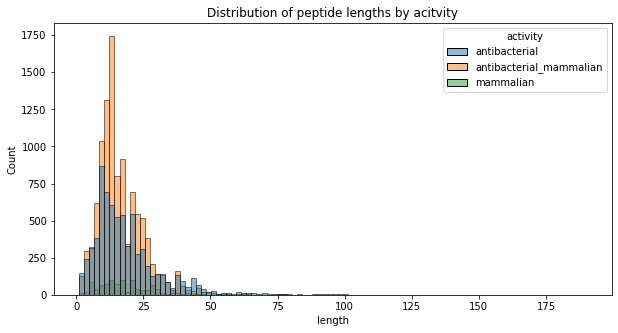

In [31]:
# Plot a histogram of the peptide lengths by activity
plt.figure(figsize=(10, 5))

sns.histplot(data=combined_df, x="length", hue="activity", bins=100)
plt.title("Distribution of peptide lengths by acitvity")

Not reallly that much of a difference.

## Next steps  
  
The exact next steps are up to you!

I propose that we can set up a simple, but interesting classification task where the goal is to use the amino-acid sequence to predict the activity of the peptide. We can discuss exactly how to do this. We can propose a multiclass classification task, a series of binary tasks where we first determine if something is uniquely antimicrobial or not, etc.  
  
The main thing is that the input into our machine learining algorithm will change. We can compare the pretrained protein representation, to other baselines such as the unigram. We can see which features lead to better performance of baseline machine learning algorithms such as Random Forest, Logistic Regression or XGBoost.   
  
Have a think about it and we can discuss!